# Interactive jupyter / IPython notebook Tutorial

This tutorial works on jupyter notebook. Please download examples from here: https://github.com/AB-CE/examples and load the jupyter_tutorial by changing in the `examples/jupyter_tutorial` folder and typing `jupyter notebook jupyter_tutorial.ipynb`. Then you can execute the notebook cell by cell and observe ABCE at work.

In [1]:
import abcEconomics as abce

LOCAL
[I 16:50:00 flexx.app] Asset store collected 2 new modules.


In [2]:
simulation = abce.Simulation(name='ipythonsimulation', processes=1)

## Creating the Agent
We create a simple agent and intialize it. An agent is an object that has propeties and does things. In python that is a class. We create an agent that has a name, knows the world size and can say his name. 

The agent needs to inherit from abce.Agents. *The `__init__` function should not be overwritten, instead create an `init` function*. The init function will be called during initialisation.
The agents gets two parameters. All agents get the parameters we will specify in the next round. From agent_parameters the agents get only agent_parameters[id], where id is the number of the agent.
Agents have for now only one function. They can say their name.

In [3]:
class Agent(abce.Agent):
    def init(self, world_size, family_name):
        self.family_name = family_name
        self.world_size = world_size
        print(world_size)
        
    def say(self):
        print("hello I am %s my id %i and my group is '%s', it is the %i round" % (self.family_name, self.id, self.group, self.time))

From the abstract agent, we create four concrete agents.

In [4]:
agents = simulation.build_agents(Agent, 'agent',
                                 world_size=30,
                                 agent_parameters=[{'family_name': 'fred'}, 
                                                   {'family_name': 'astaire'}, 
                                                   {'family_name': 'altair'}, 
                                                   {'family_name': 'deurich'}])

30
30
30
30


`agents` allows you to call each agents in the agents group. Each agent in this group has a group name, which is 'agent' and an id. Further we give each of the agents a parameter a family_name.
We can now run the simulation and let all agents say their name:

In [5]:
for r in range(5):
    simulation.time = r
    agents.say()

hello I am deurich my id 3 and my group is 'agent', it is the 0 round
hello I am fred my id 0 and my group is 'agent', it is the 0 round
hello I am altair my id 2 and my group is 'agent', it is the 0 round
hello I am astaire my id 1 and my group is 'agent', it is the 0 round
hello I am deurich my id 3 and my group is 'agent', it is the 1 round
hello I am fred my id 0 and my group is 'agent', it is the 1 round
hello I am altair my id 2 and my group is 'agent', it is the 1 round
hello I am astaire my id 1 and my group is 'agent', it is the 1 round
hello I am deurich my id 3 and my group is 'agent', it is the 2 round
hello I am fred my id 0 and my group is 'agent', it is the 2 round
hello I am altair my id 2 and my group is 'agent', it is the 2 round
hello I am astaire my id 1 and my group is 'agent', it is the 2 round
hello I am deurich my id 3 and my group is 'agent', it is the 3 round
hello I am fred my id 0 and my group is 'agent', it is the 3 round
hello I am altair my id 2 and my gr

It is necessary to tell the simulation when a new round starts. The parameter can be any representation of time.

## Giving a Good
ABCE provide goods. Goods are things that can be given, sold or transformed.
We create 5 agents, the first one has a balls the agents pass the ball around.

In [6]:
class Kid(abce.Agent):
    def init(self, num_kids):
        self.num_kids = num_kids
        if self.id == 0:
            self.create('ball', 1)
        
    def whether_I_have_the_ball(self):
        if self['ball'] > 0:
            print('*', end="", flush=True)
        else:
            print('.', end="", flush=True)
            
    def give_the_ball_to_the_next_kid(self):
        next_kid = (self.id + 1) % self.num_kids  # the id of the next kid, if I am the last the first kid
        if self['ball'] >= 1:
            self.give(('kid', next_kid), good='ball', quantity=1)
            
    
        

self.create, creates an object. self.possession, checks how much of one object an agent has. self.give, gives an object to another agent, specied by its group name and its id.

In [7]:
num_kids = 5

In [8]:
simulation = abce.Simulation(name='ipythonsimulation', processes=1)

In [9]:
kids = simulation.build_agents(Kid, 'kid', number=num_kids,
                               num_kids=num_kids) 
                            

When agent_parameters is not specified the numer of agents to be created needs to be spezified

In [10]:
for r in range(7):
    simulation.advance_round(r)
    kids.whether_I_have_the_ball()
    print()
    kids.give_the_ball_to_the_next_kid()

...*.
....*
*....
..*..
.*...
...*.
....*


## Trade

In [11]:
from random import randrange

Well in every school yard we have a drug dealer.

In [12]:
class NewKid(abce.Agent):
    def init(self, num_dealers):
        self.num_dealers = num_dealers
        self.create('money', 100)  # don't we all wish you'd this function in real live?
        
    def buy_drugs(self):
        drug_dealer_id = randrange(self.num_dealers)
        self.buy(('drug_dealer', drug_dealer_id), good='drugs', quantity=1, price=10)
    
    def print_possessions(self):
        print('    ' + self.group + str(dict(self.possessions())))
        
    

The new kids, approach a random drug dealer and offer him 10 bucks.

In [13]:
class DrugDealer(abce.Agent):
    def init(self):
        self.create('drugs', 1)
        
    def sell_to_customers(self):
        for offer in self.get_offers('drugs'):
            if offer.price >= 10 and self['drugs'] >= 1:
                self.accept(offer)
    
    def print_possessions(self):
        print('    ' + self.group + str(dict(self.possessions())))

Drug dealer look at all the sell offers they get and decide to sell only to those kids that are willing to give them at least 10 dollars.

In [14]:
num_dealers = 1

In [15]:
simulation = abce.Simulation(name='school_yard', processes=1)

In [16]:
drug_dealers = simulation.build_agents(DrugDealer, 'drug_dealer', number=num_dealers)

In [17]:
customers = simulation.build_agents(NewKid, 'customer', number=1, 
                                   num_dealers=num_dealers)

builds 1 drug dealer and one customer.

In [18]:
kids = drug_dealers + customers

Groups of agents can be merged to 'super' groups. We will print the amount of drugs and money all kids have for each of the two kids

In [19]:
for r in range(2):
    simulation.advance_round(r)
    print('Customer offers 10 dollar:')
    customers.buy_drugs()
    kids.print_possessions()
    print('Drug Dealer accepts or rejects the offer:')
    drug_dealers.sell_to_customers()
    kids.print_possessions()
    print()

Customer offers 10 dollar:
    customer{'money': 90.0}
    drug_dealer{'drugs': 1.0}
Drug Dealer accepts or rejects the offer:
    customer{'money': 100.0}
    drug_dealer{'drugs': 1.0}

Customer offers 10 dollar:
    customer{'money': 90.0}
    drug_dealer{'drugs': 1.0}
Drug Dealer accepts or rejects the offer:
    customer{'money': 100.0}
    drug_dealer{'drugs': 1.0}



When looking at round one one can see that after the customer offered 10 dollars, the 10 dollars are not available to him util the deal has either been accepted or rejected. After the drug dealer accepts the offer in the 0 round. The money is transfered to the drug dealer and the drugs to the customer.

In round 1, where the drug dealer runs out of drugs the 10 dollars go back to the customer.


## Lets capture data


There are three ways of capturing data. `aggregate` and `panel` collect data from a specified group at a specified point of time. This has the advantage that there is no logging code in the agent class. `self.log('name', value)` saves a value under a certain name.

In [20]:
from math import sin

class DataDealer(abce.Agent):
    def init(self):
        self.count = 0
        self.create('money', 0)

    def counting(self):
        self.count += 1
        self.curve = sin(self.count / 100)
        self.create('money', self.curve * self.id)
        
        

In [21]:
simulation = abce.Simulation(name='gatherdata', processes=1)

It is specified which agents group collects which variables and possessions.

In [22]:
datadealers = simulation.build_agents(DataDealer, 'datadealer', number=10)

Every round the groups need to be instructed to collect the according data. **simulation.finalize()** must be called after the simulation, to write the data! Otherwise the program hangs.

In [23]:

for r in range(100):
    simulation.advance_round(r)
    datadealers.counting()
    datadealers.agg_log(variables=['count'])
    datadealers.panel_log(goods=['money'], variables=['curve'])
simulation.finalize()    
        


time only simulation   0.04
time with data   0.19


We can find the directory of the simulation data by using the `simulation.path` property

In [24]:
print(simulation.path)

/Users/taghawi/Dropbox/workspace/abcExamples/examples/jupyter_tutorial/result/gatherdata_2018-12-30_16-50


In that directory are the data files and a describtion.txt

In [25]:
import os
os.listdir(simulation.path)

['panel_datadealer.csv',
 'aggregated_datadealer.csv',
 'aggregate_datadealer.csv',
 'description.txt']

## Using statistical software

In [26]:
import pandas as pd

In [27]:
%matplotlib inline


In [28]:
df = pd.read_csv(simulation.path + '/panel_datadealer.csv')

In [29]:
df.head(20)

,index,curve,money,round,name
0,1,0.010000,0.069999,0,datadealer7
1,2,0.010000,0.039999,0,datadealer4
2,3,0.010000,0.049999,0,datadealer5
3,4,0.010000,0.079999,0,datadealer8
4,5,0.010000,0.020000,0,datadealer2
5,6,0.010000,0.089999,0,datadealer9
6,7,0.010000,0.030000,0,datadealer3
7,8,0.010000,0.000000,0,datadealer0
8,9,0.010000,0.010000,0,datadealer1
9,10,0.010000,0.059999,0,datadealer6


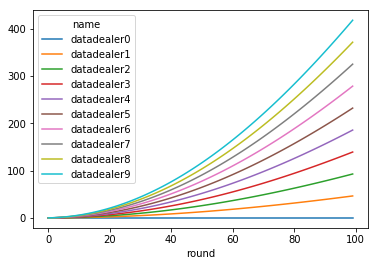

In [30]:
df.pivot(index='round', columns='name', values='money').plot()


# Communication between Simulation and Agents

In [31]:
simulation = abce.Simulation()

In [32]:
class Communicator(abce.Agent):
    def report_my_name(self):
        return self.name
    
    def do_as_told(self, time, text):
        print("it is %i o'clock and I have to say %s" % (time, text))

In [33]:
communicators = simulation.build_agents(Communicator, 'communicator', number=3)

In [34]:
for time in range(3):
    simulation.advance_round(time)
    communicators.report_my_name()
    communicators.do_as_told(time=time, text="Right says fred")
    
    

it is 0 o'clock and I have to say Right says fred
it is 0 o'clock and I have to say Right says fred
it is 0 o'clock and I have to say Right says fred
it is 1 o'clock and I have to say Right says fred
it is 1 o'clock and I have to say Right says fred
it is 1 o'clock and I have to say Right says fred
it is 2 o'clock and I have to say Right says fred
it is 2 o'clock and I have to say Right says fred
it is 2 o'clock and I have to say Right says fred


One caviat is that **only keyword arguments** work.